                                  Задача от «IaC Bank of China»

 Прогнозирование Финансового Инструмента с Использованием Датасайнс Методов



Цель:
Определить применимость методов датасайнса для прогнозирования значений финансового инструмента на основе предоставленных данных.

Данная работа выполнена на основе статьи по прогнозированию временных рядов , а именно на работе по предсказанию температуры воздуха (https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ru#setup).
Вводные данные:
- Предоставлен CSV-файл с данными о нескольких финансовых инструментах и соответствующими фичами, которые, предположительно, коррелируют с изменениями значений финансовых инструментов.
Цель:
Определить применимость методов датасайнса для прогнозирования значений финансового инструмента на основе предоставленных данных, а именно прогнозирование курса валюты .


Это руководство представляет собой введение в прогнозирование временных рядов с использованием TensorFlow. Он строит несколько разных стилей моделей, включая сверточные и рекуррентные нейронные сети (CNN и RNN).

Он состоит из двух основных частей с подразделами:

### Прогноз для одного временного шага:
Единственная особенность.
Все функции.
### Прогноз нескольких шагов:
Single-shot: Делайте прогнозы сразу.
Авторегрессия: делайте по одному прогнозу за раз и отправляйте выходные данные обратно в модель.

Установим необходимые библиотеки для решения нашей задачи.

In [9]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

Набор данных предоставленный заказчиком «IaC Bank of China»
В этом руководстве используется набор данных временных рядов курса валют и т.д., записанный банком на протяжении длительного времени.

Этот набор данных содержит 27 различных столбцов, таких как курсы валют по отношению к доллару,форвард поинт, всевозможные коэффициенты и индексы, а так же  3892 строки. Они собирались  начиная с 2007 года. Для эффективности вы будете использовать только данные, собранные в период с 2007 по 2019 год. Данные с 2019 по 2021  используются для тестовой выборки данных

In [10]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv('data/all_data.csv', sep=',')


In [11]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


### Давайте взглянем на  данные. Вот первые несколько строк:

In [12]:
data

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.00,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.00,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.00,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.00,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.00,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,5.6316,59.00,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,5.6275,39.26,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,5.6932,68.23,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,5.5697,78.02,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [13]:
# создадим копию данных
drop_data = data.copy()

### Осмотр и очистка данных

In [14]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [15]:
#удаление пропусков спота из-за выходных и праздников(требование заказчика)
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [16]:
#добавление предыдущих значений признаков в пустые места(требование заказчика)
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [17]:
#вычисление изменения цены

drop_data['devprice'] = (drop_data['USDBRL Curncy'].shift(-1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(-1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'devprice')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(t_data.tail(1).index, inplace=True)

Проверка наших данных на изменения , которые мы хотели сделать

In [19]:
t_data

,Date,devprice,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,0.001616,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,55040.0,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,-0.005494,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,-0.003787,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.002915,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.000048,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2021-12-23,-0.008289,1.1327,1.3408,114.39,20.6433,0.7190,1.3076,76.85,69820.0,...,96.019,212.000,93.500,5.3325,814.75,605.75,231.20,2.3405,2.4952,23.9
3887,2021-12-27,-0.000938,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.011402,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.022419,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0


### Использование инструментов визуалиазации для анализа данных

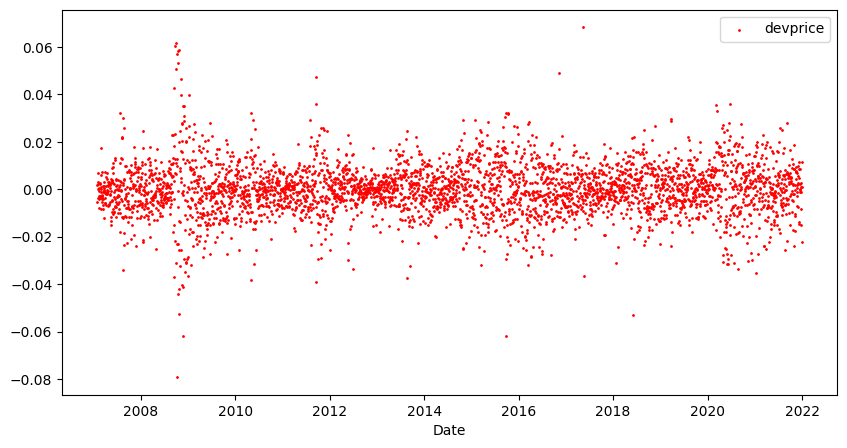

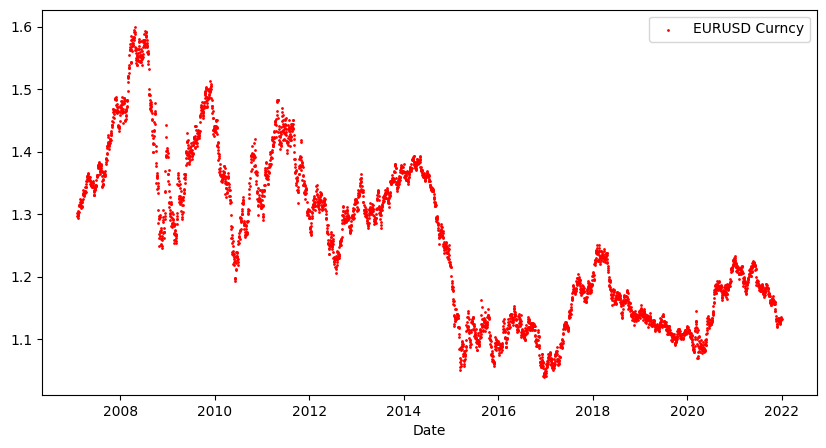

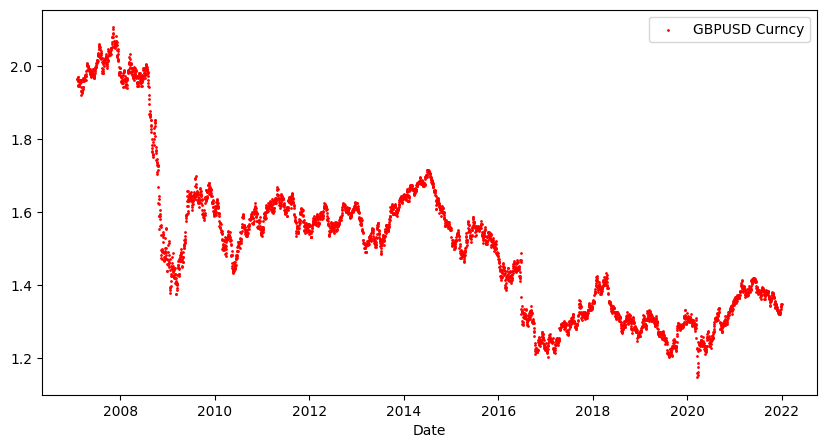

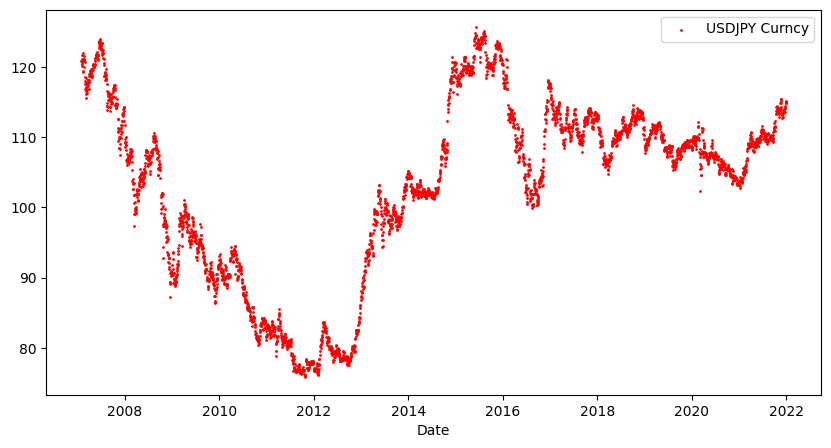

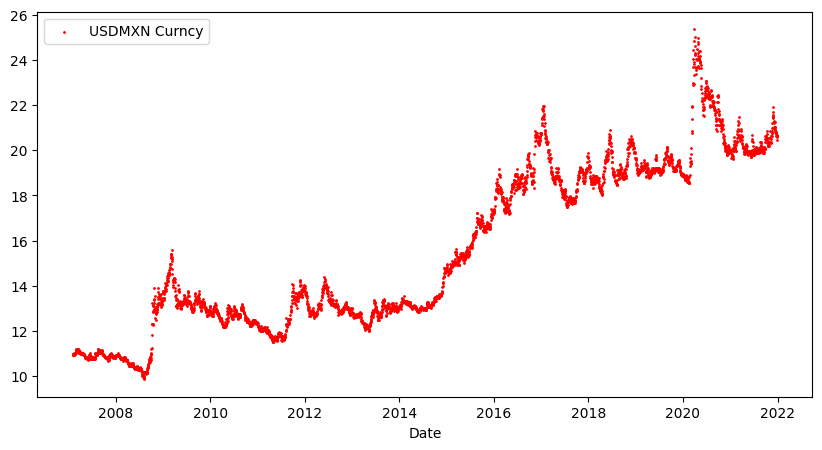

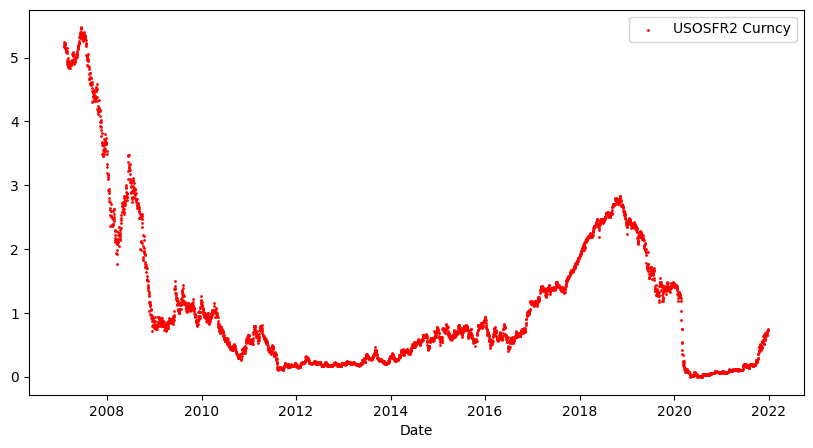

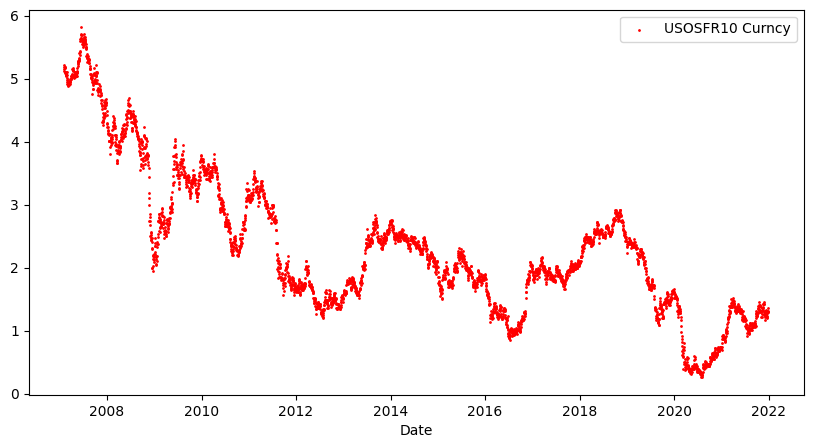

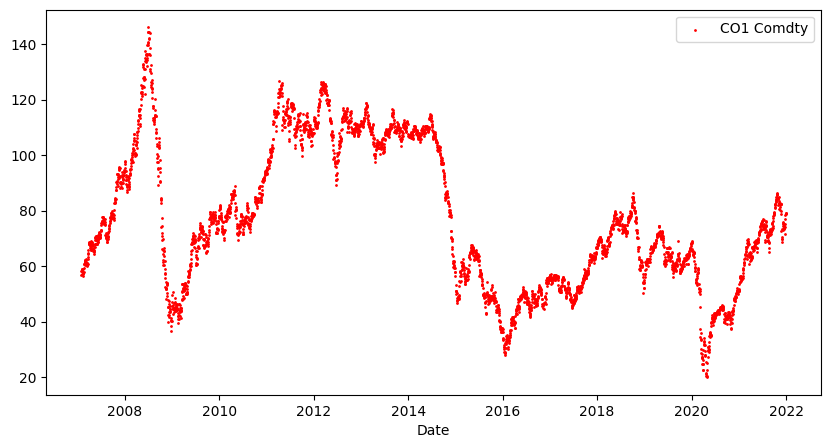

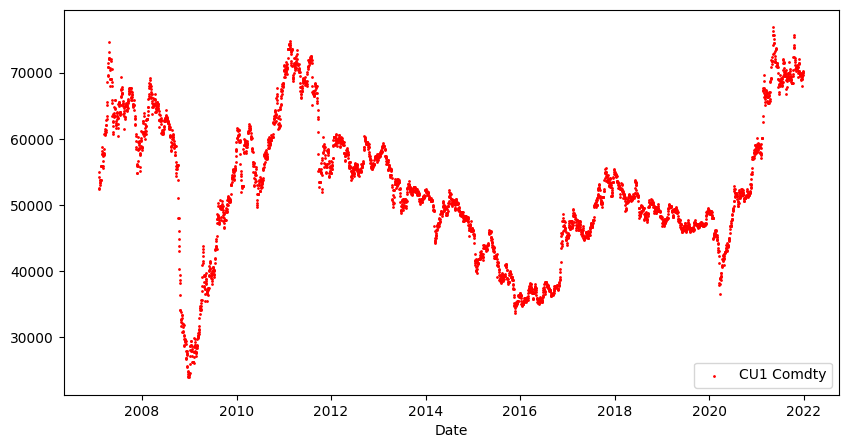

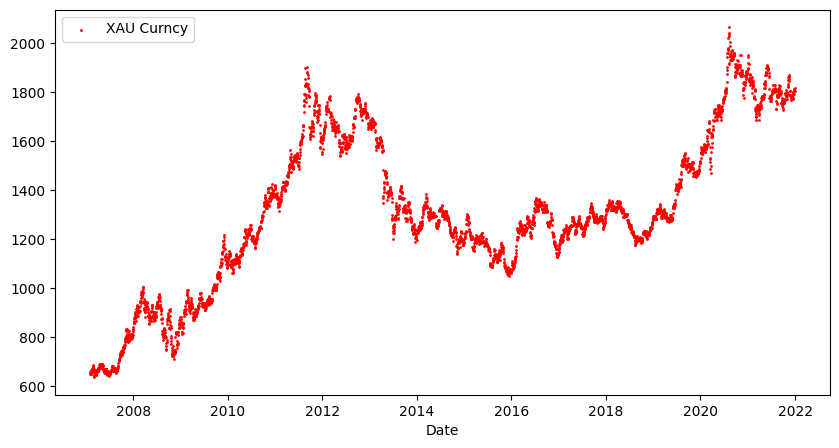

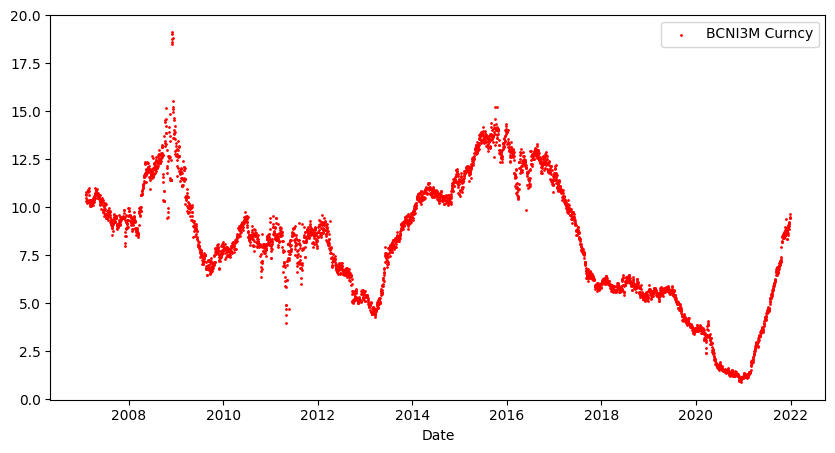

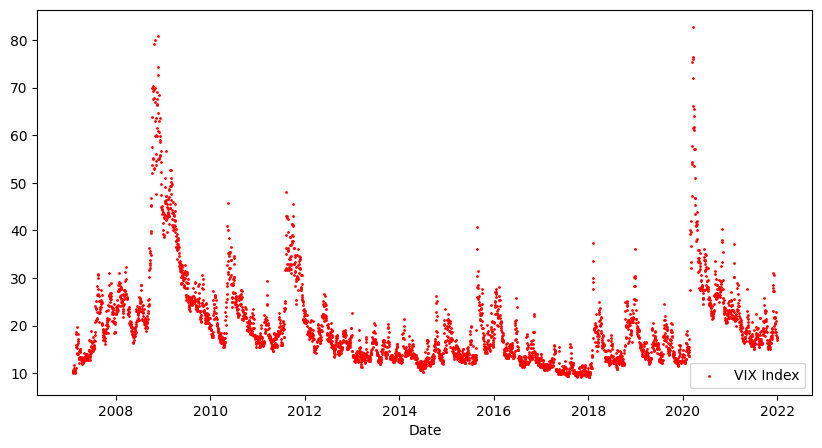

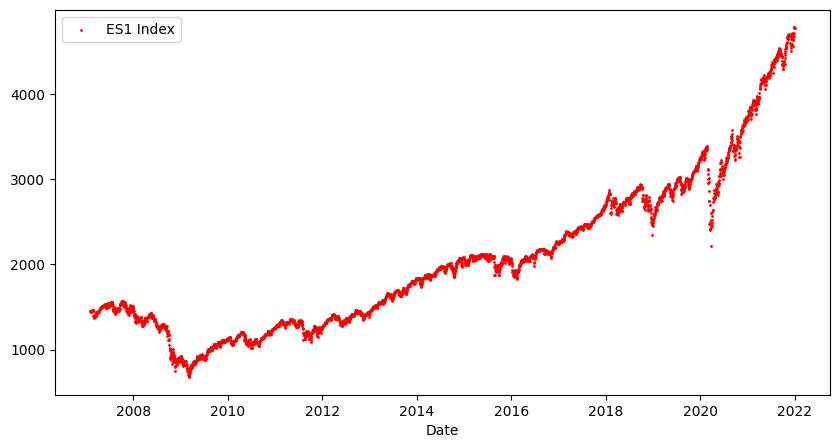

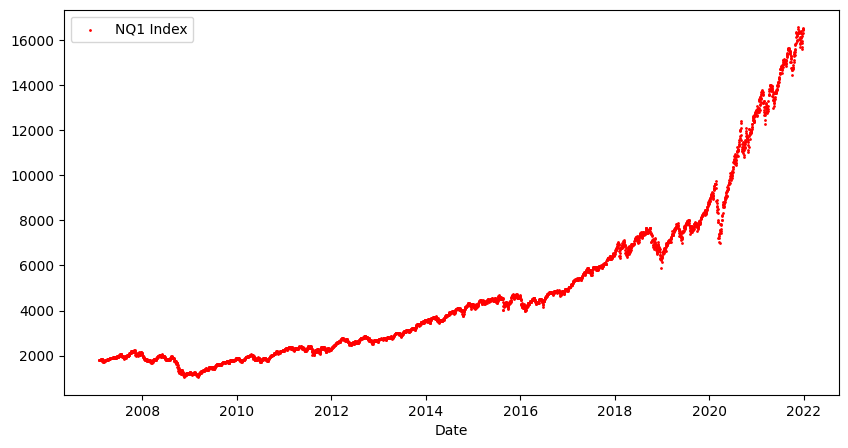

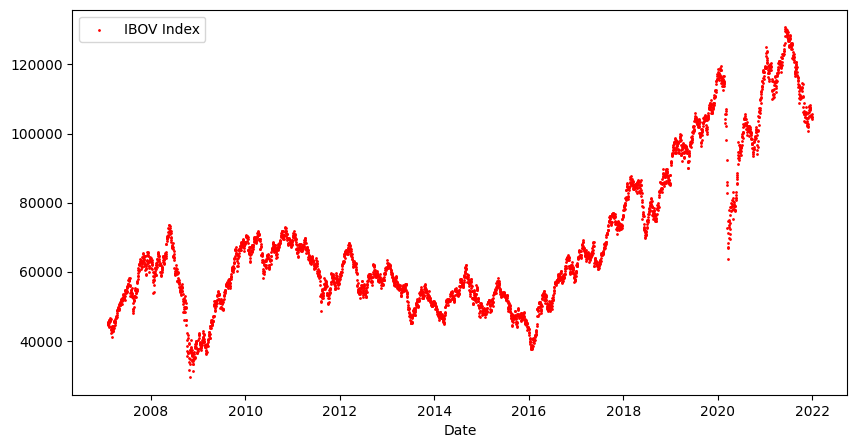

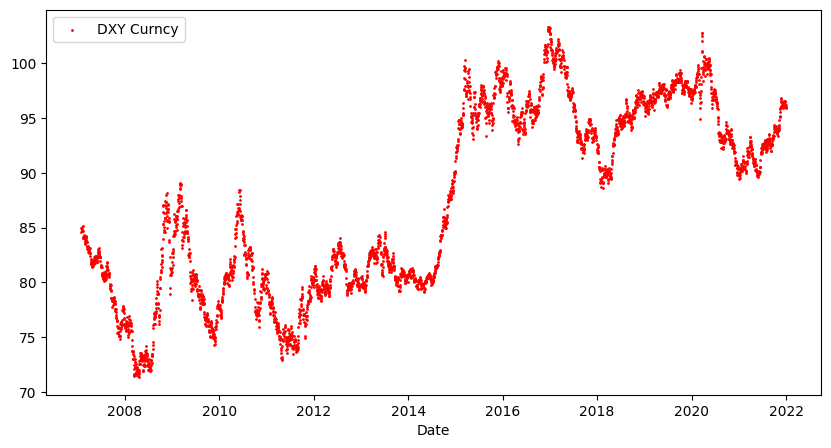

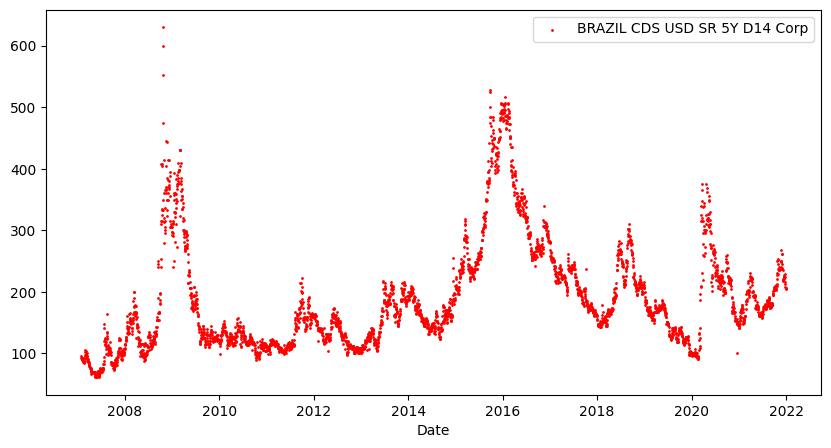

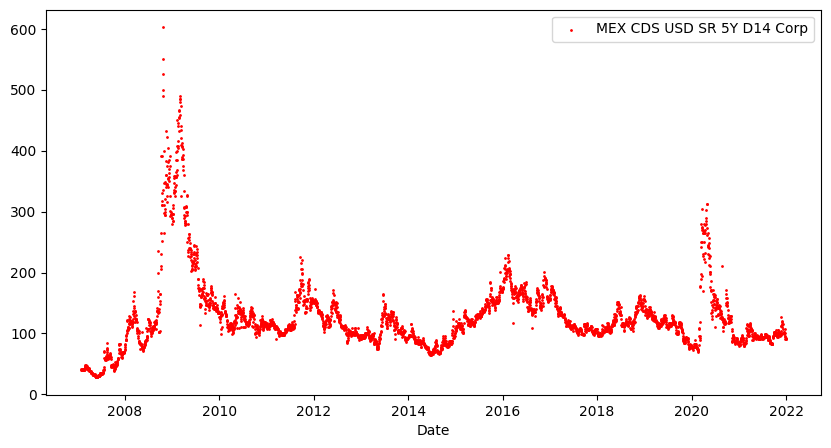

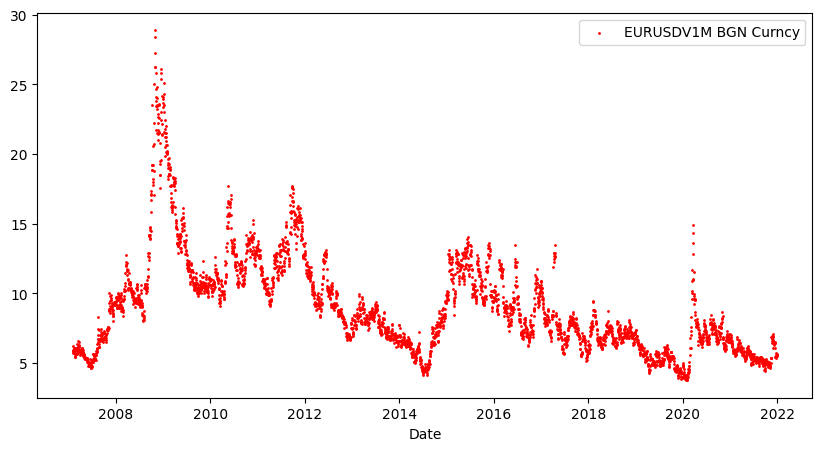

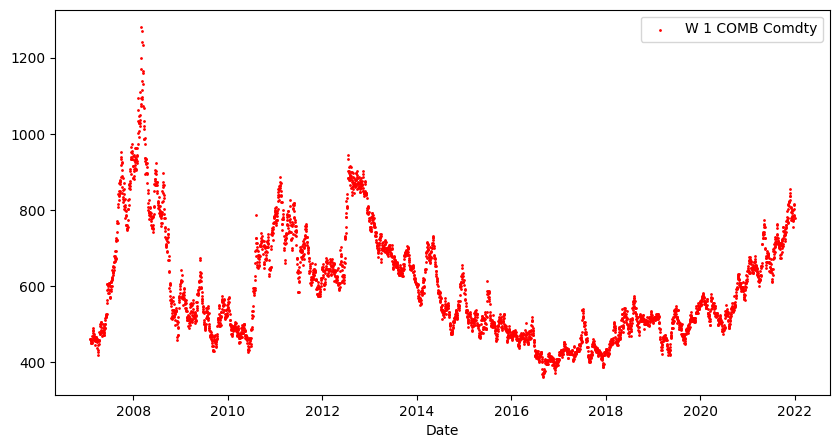

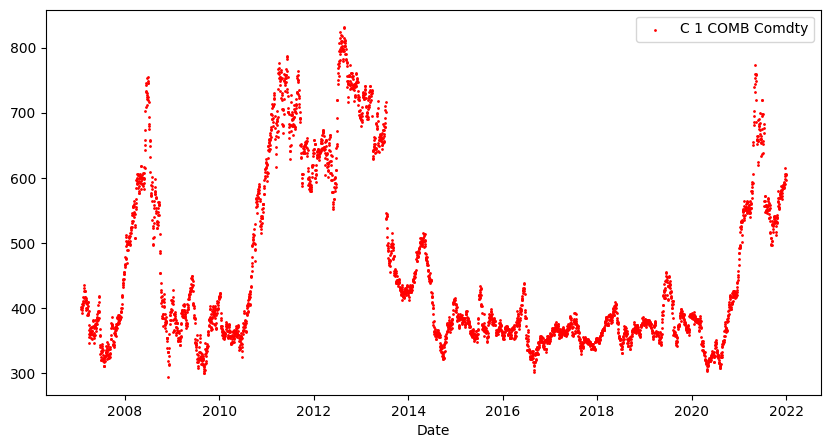

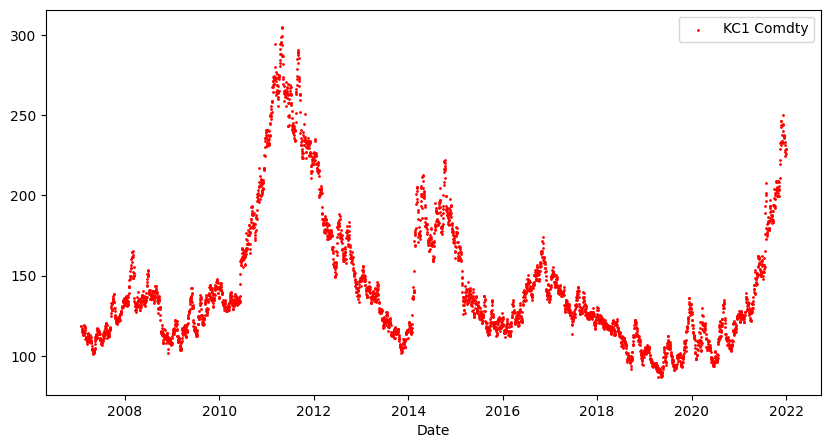

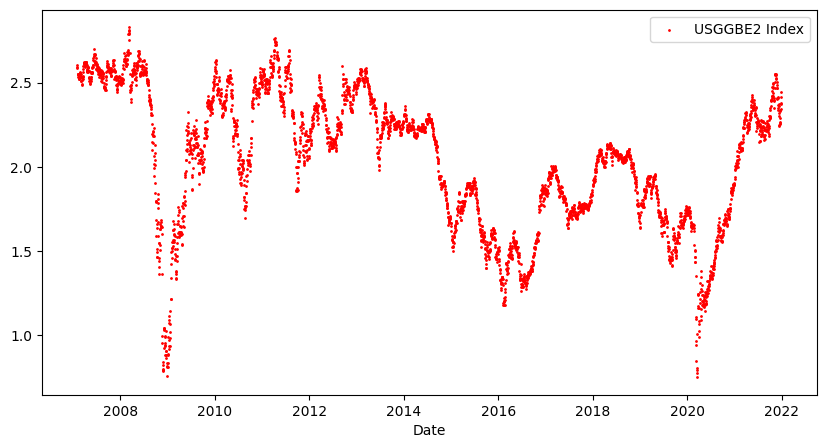

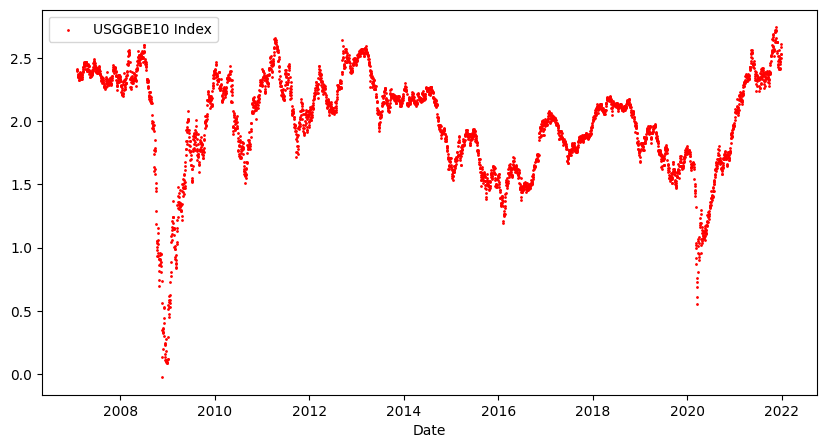

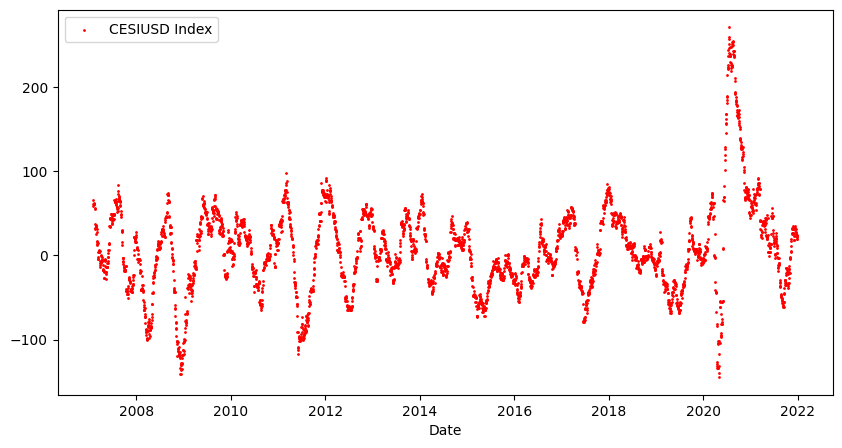

In [20]:
# построение графиков распределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

Визуализация данных , которые нам предоставили, не имеет сильных локальных выбросов, что позволяет нам продолжить дальнейшую обработку и подготовку данных для наших моделей.

In [21]:
#вычисление таргета
#t_data['target']=(t_data['devprice']-t_data['devprice'].mean())/t_data['devprice'].std()
t_data['target']=(t_data['devprice']-t_data['devprice'].min())*(10/(t_data['devprice'].max()-t_data['devprice'].min()))-5
#t_data['target'] = np.where(t_data['target'] == -0.0, 0.0, t_data['target'])
new_columns = t_data.columns[:-1].to_list()
new_columns.insert(2, 'target')
t_data = t_data[new_columns]

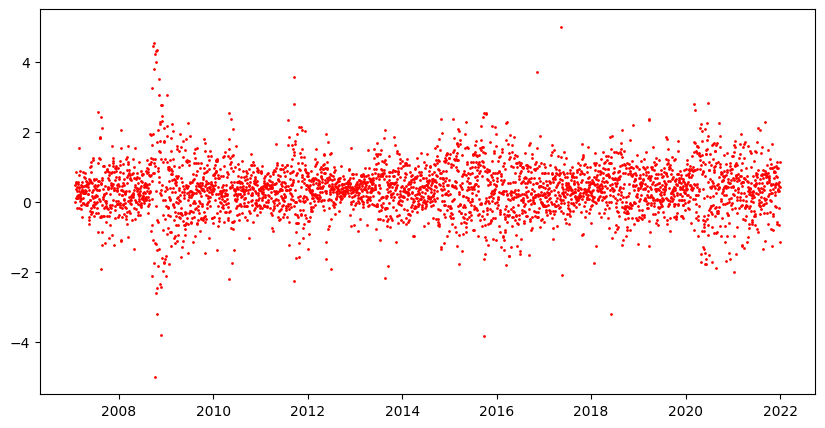

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.scatter(
    x=t_data['Date'],
    y=t_data['target'],
    s=1,
    marker='o',
    c = 'red',
    label=column
);

## Статистический анализ
Этот код выполняет описательную статистику для каждого столбца в DataFrame t_data и выводит результаты в транспонированной форме. 

Описательная статистика включает в себя следующие значения: 

- count: количество непустых значений в столбце
- mean: среднее значение
- std: стандартное отклонение
- min: минимальное значение
- 25%: нижний квартиль (25-й процентиль)
- 50%: медиана (50-й процентиль)
- 75%: верхний квартиль (75-й процентиль)
- max: максимальное значение

Транспонирование (transpose()) меняет столбцы на строки и наоборот, чтобы результаты описательной статистики были легко читаемыми.




In [25]:
t_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
devprice,3755.0,-0.000070,0.010827,-0.07924,-0.005884,-0.000054,0.005883,0.068323
target,3755.0,0.365137,0.733717,-5.00000,-0.028816,0.366225,0.768580,5.000000
EURUSD Curncy,3755.0,1.258541,0.130565,1.03880,1.134350,1.252500,1.358200,1.599100
GBPUSD Curncy,3755.0,1.519371,0.213321,1.14850,1.327600,1.524500,1.615450,2.107500
USDJPY Curncy,3755.0,102.798123,12.708885,75.82000,93.770000,106.280000,111.380000,125.630000
USDMXN Curncy,3755.0,15.582906,3.618855,9.85810,12.765200,13.827200,19.026800,25.358800
USOSFR2 Curncy,3755.0,1.154606,1.204237,-0.00920,0.274200,0.715700,1.464650,5.475200
USOSFR10 Curncy,3755.0,2.329548,1.130269,0.26120,1.559650,2.107200,2.819250,5.816300
CO1 Comdty,3755.0,76.687822,25.579646,19.99000,56.125000,71.900000,102.905000,146.080000
CU1 Comdty,3755.0,52442.689747,10301.202839,24000.00000,46685.000000,51460.000000,59300.000000,76840.000000


Создание тестого набора, который составляет 20 процентов от общего набора данных.

In [28]:
#выделение тестового набора для сохранения ненормализованных значений
n = len(t_data)
test_df_0 = t_data[int(n*0.8):]

# Разработка функций
Прежде чем погрузиться в построение модели, важно понять наши данные и убедиться, что мы  передаете модели данные в соответствующем формате.

In [36]:
# Преобразование datetime в дни
data_start=t_data['Date'].min()
t_data['Date'] = (t_data['Date'] - data_start).dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [32]:
#нормализация данных к диапазону от -1 до 1
t_data=t_data.drop('devprice', axis=1)
for column in t_data.columns:
    if column not in ['target']:
        t_data[column]=(t_data[column]-t_data[column].min())*(10/(t_data[column].max()-t_data[column].min()))-5

KeyError: "['devprice'] not found in axis"

обучающие, проверочные и тестовые данные

In [31]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}


train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]


### Окно данных
Модели в этом руководстве будут делать набор прогнозов на основе окна последовательных выборок из данных.

Основные особенности окон ввода:

  -Ширина (количество временных шагов) окон ввода и метки.

  -Смещение времени между ними.

  -Какие функции используются в качестве входных данных, меток или того и другого.

В этом руководстве создаются различные модели (включая линейные модели, модели DNN, CNN и RNN) и используются они для обеих целей:

  -Прогнозы с одним выходом и несколькими выходами .

  -Прогнозы с одним и несколькими временными шагами .

В этом разделе основное внимание уделяется реализации окна данных, чтобы его можно было повторно использовать для всех этих моделей.

В зависимости от задачи и типа модели может потребоваться создание различных окон данных. Вот некоторые примеры:

 1.Например, чтобы сделать один прогноз на 24 часа вперед, учитывая 24-часовую историю, вы можете определить окно следующим образом:
 
 
 
   
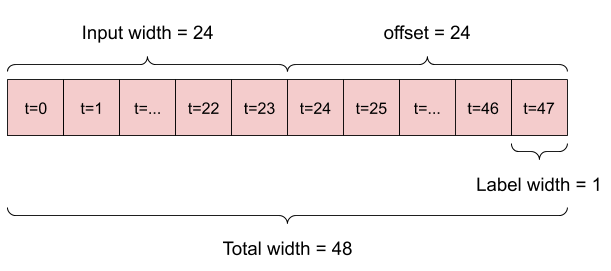













  Одно предсказание на 24 часа вперед.
  

  2.Модель, которая делает прогноз на один час вперед, учитывая шесть часов истории, нуждалась бы в таком окне:
  
  
  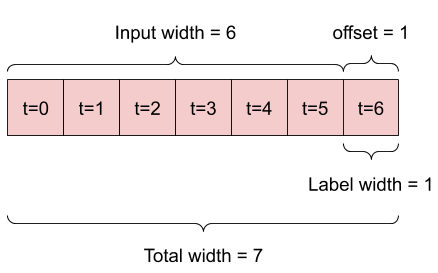
  
  
  
  
  
  
  
  
  
  





  Одно предсказание на час вперед


В оставшейся части этого раздела определяется класс WindowGenerator . Этот класс может:

  1.Обрабатывайте индексы и смещения, как показано на диаграммах выше.
  
  2.Разделить окна функций на пары (features, labels) .
  
  3.Постройте содержимое получившихся окон.
  
  4.Эффективно генерируйте пакеты этих окон из обучающих, оценочных и тестовых данных,
    используя      tf.data.Dataset s.
  
### Индексы и смещения
Начните с создания класса WindowGenerator . Метод __init__ включает всю необходимую логику для индексов ввода и меток.

Он также принимает обучающие, оценочные и тестовые кадры данных в качестве входных данных. Позже они будут преобразованы в
   tf.data.Dataset окон.   

In [37]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

###  Сплит

Учитывая список последовательных входных данных, метод split_window преобразует их в окно входных данных и окно меток.

Пример , который мы определили ранее, будет разбит следующим образом:




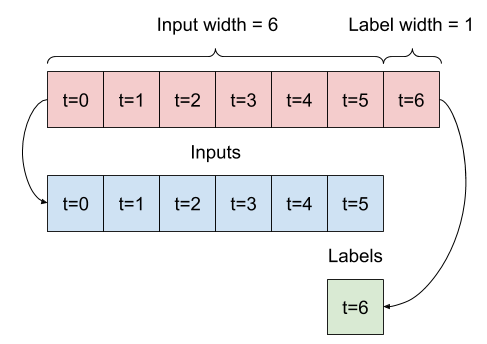









Начальное окно представляет собой все последовательные выборки, это разбивает его на пары (входы, метки).

На этой диаграмме не показана ось features данных, но эта функция split_window также обрабатывает label_columns , поэтому ее можно использовать как для примеров с одним выходом, так и для примеров с несколькими выходами.
Теперь в объекте WindowGenerator доступен метод split_window, который можно использовать для разделения окон на входы и метки в заданных размерностях.

In [20]:
#сплит с учетом разделения окон и меток
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

#### Вот метод построения графика, который позволяет легко визуализировать разделенное окно:
    "Эта функция plot добавляется в класс WindowGenerator. Она позволяет визуализировать данные и (опционально) предсказания модели на графиках. Вот что делает эта функция:
    Принимает входные параметры self, model, plot_col и max_subplots
    Получает входы и метки (labels) из self.example, которое предполагается, 
    что было установлено заранее
    Создает график с заданными размерами (12 на 8 дюймов)
    Определяет индекс столбца plot_col в массиве данных (plot_col_index)
    Определяет максимальное количество подграфиков, которые могут быть созданы (max_n), 
    ограниченное заданным значением max_subplots и количеством доступных входов 
    Для каждого подграфика в пределах max_n  
    Создает отдельный подграфик с меткой оси y, соответствующей plot_col.    
    Рисует график входов (inputs) на подграфике  
    Если есть метки (labels), рисует точки меток на графике  
    Если есть модель, рисует точки предсказаний на графике  
    Добавляет легенду на первом подграфике
    Добавляет метку оси x, соответствующую 'days'
    
    
    
  Теперь в объекте WindowGenerator доступна функция plot, которую можно использовать для визуализации данных и предсказаний модели.

In [21]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

### Создайтем tf.data.Dataset s
Этот метод make_dataset возьмет временной ряд DataFrame и преобразует его в tf.data.Dataset из пар (input_window, label_window) с помощью функции tf.keras.utils.timeseries_dataset_from_array :




In [22]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

Объект WindowGenerator содержит обучающие, проверочные и тестовые данные.

Добавьте свойства для доступа к ним как tf.data.Dataset с помощью метода make_dataset , который вы определили ранее. Кроме того, добавьте стандартный пакет примеров для быстрого доступа и построения графиков:

In [23]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### Одноступенчатые модели
Самая простая модель, которую вы можете построить на такого рода данных, — это модель, которая предсказывает значение одной функции — 1 временной шаг (один час) в будущее, основываясь только на текущих условиях.

Итак, начните с построения моделей для прогнозирования значения 'target' на один час вперед.


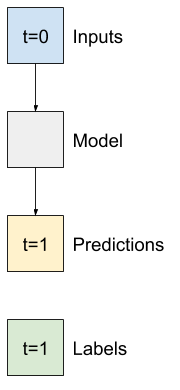














Предсказать следующий временной шаг

Настройте объект WindowGenerator для создания этих одношаговых пар (input, label)

In [24]:
#Одноступенчатые модели

In [25]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

Объект window создает tf.data.Dataset из обучающих, проверочных и тестовых наборов, что позволяет легко перебирать пакеты данных.

In [26]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


### Базовый уровень
Перед созданием обучаемой модели было бы неплохо иметь базовый уровень производительности в качестве точки для сравнения с более поздними более сложными моделями.

Эта первая задача состоит в том, чтобы предсказать 'target' на один час вперед, учитывая текущее значение всех признаков. Текущие значения включают текущий 'target'.

Итак, начнем с модели, которая просто возвращает текущуй 'target' в качестве прогноза, прогнозируя «без изменений». Это разумная базовая линия, поскольку 'target' изменяется медленно. Конечно, эта базовая линия будет работать хуже, если вы сделаете прогноз в будущем.











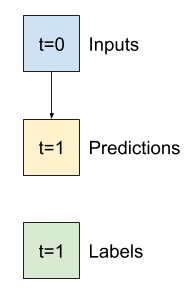



In [27]:
#базовый прогноз, возращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


Создайте экземпляр и оцените эту модель:

In [28]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


38/38 [==============================] - 0s 2ms/step - loss: 1.0079 - mean_absolute_error: 0.7470


Это напечатало некоторые показатели производительности, но они не дают вам представления о том, насколько хорошо работает модель.

В WindowGenerator есть метод plot, но графики будут не очень интересными только с одним образцом.

Итак, создайте более широкий WindowGenerator , который генерирует окна 24 часа последовательных входных данных и меток за раз. Новая переменная wide_window не меняет способ работы модели. Модель по-прежнему делает прогнозы на один час вперед на основе одного входного временного шага. Здесь time ось действует как batch ось: каждый прогноз делается независимо, без взаимодействия между временными шагами:

In [67]:
wide_window = WindowGenerator(
    input_width=50, label_width=50, shift=1,
    label_columns=['target'])

test_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])

wide_window

Total window size: 51
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Label column name(s): ['target']

Это расширенное окно можно передать непосредственно в ту же baseline модель без каких-либо изменений кода. Это возможно, потому что входы и метки имеют одинаковое количество временных шагов, а базовая линия просто перенаправляет вход на выход:









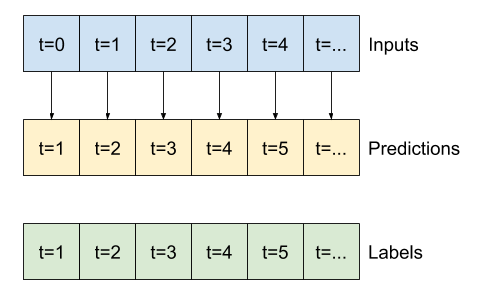

In [30]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


Построив прогнозы базовой модели, обратите внимание, что это просто метки, сдвинутые вправо на один час:

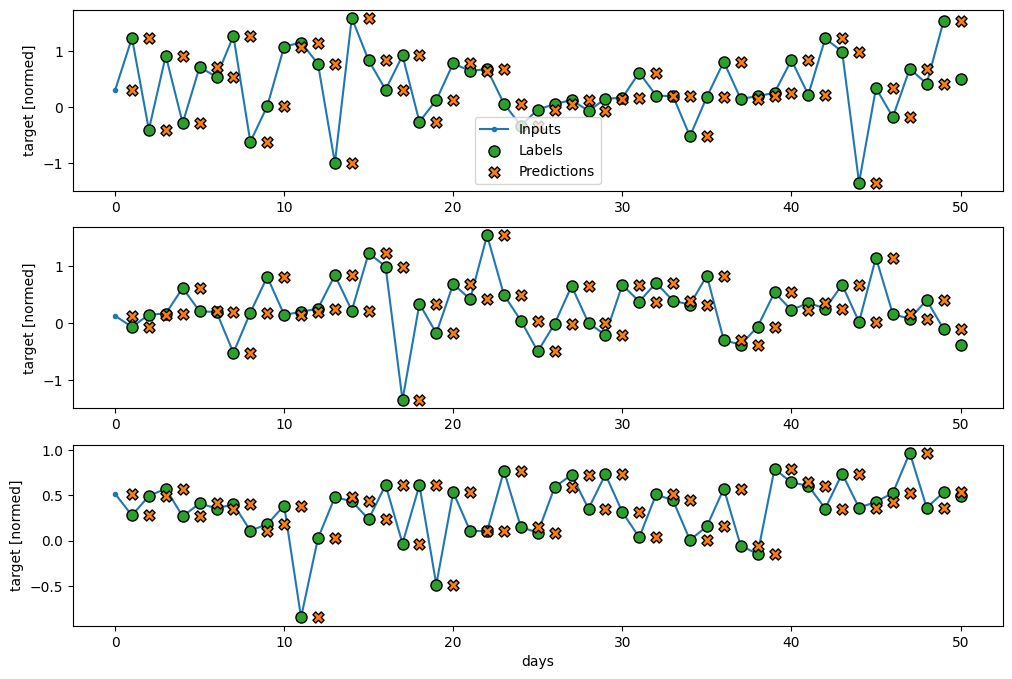

In [31]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

На приведенных выше графиках трех примеров одноэтапная модель работает в течение 24 часов. Это заслуживает некоторого пояснения:

- Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
- Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
- Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

### Линейная модель
Самая простая обучаемая модель, которую вы можете применить к этой задаче, — это вставить линейное преобразование между входом и выходом. В этом случае результат временного шага зависит только от этого шага:










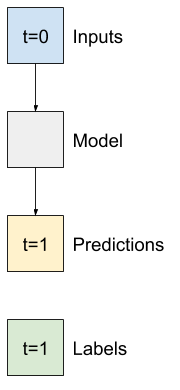

Слой tf.keras.layers.Dense без набора activation является линейной моделью. Слой преобразует только последнюю ось данных из (batch, time, inputs) в (batch, time, units) ; он применяется независимо к каждому элементу по осям batch и time .

In [32]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [33]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


В этом руководстве обучается множество моделей, поэтому упакуйте процедуру обучения в функцию:

In [34]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Обучим модель и оценим ее производительность:

In [35]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 2.5302 - mean_absolute_error: 1.2432 - val_loss: 1.2163 - val_mean_absolute_error: 0.8942
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 1.1630 - mean_absolute_error: 0.8305 - val_loss: 1.2101 - val_mean_absolute_error: 0.8873
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 0.9548 - mean_absolute_error: 0.7397 - val_loss: 1.1678 - val_mean_absolute_error: 0.8693
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.8727 - mean_absolute_error: 0.7020 - val_loss: 1.0121 - val_mean_absolute_error: 0.8043
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 0.8171 - mean_absolute_error: 0.6765 - val_loss: 0.9147 - val_mean_absolute_error: 0.7628
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 0.7733 - mean_absolute_error: 0.6549 - val_loss: 0.8666 - val_mean_absolute_error: 0.7408
Epoch 7/10

Как и baseline модель, линейную модель можно вызывать для пакетов широких окон. При таком использовании модель делает набор независимых прогнозов на последовательных временных шагах. Ось time действует как другая ось batch . Между прогнозами на каждом временном шаге нет взаимодействий.









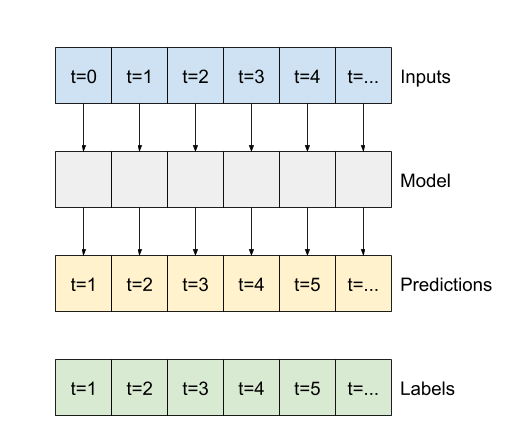

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


Вот график его примерных прогнозов для wide_window , обратите внимание, что во многих случаях прогноз явно лучше, чем просто возврат входной температуры, но в некоторых случаях он хуже:

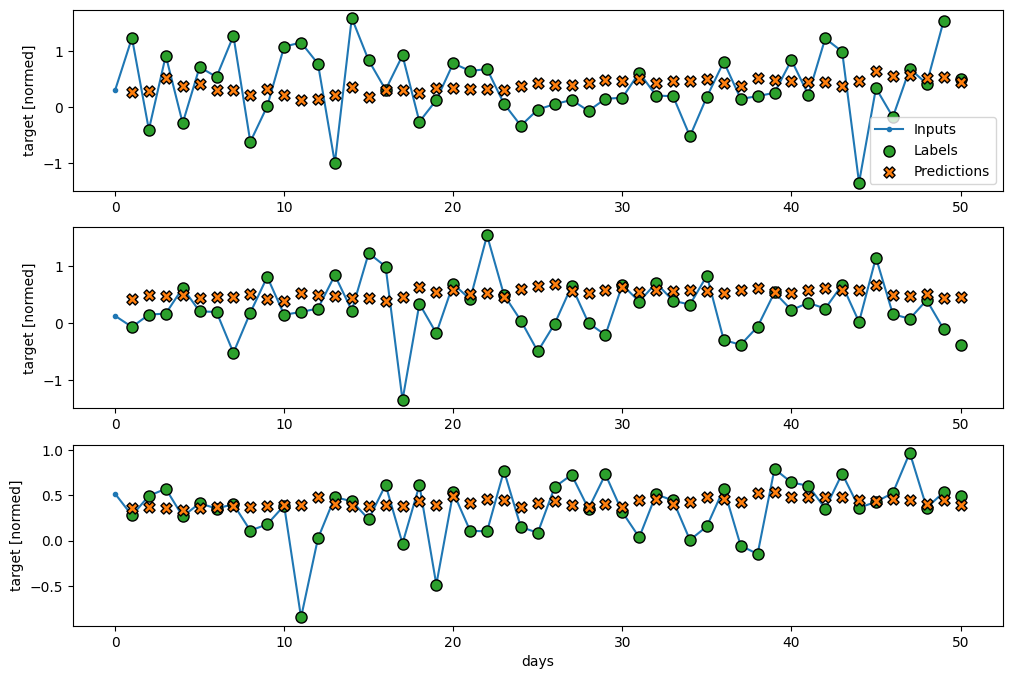

In [37]:
wide_window.plot(linear)


Одним из преимуществ линейных моделей является то, что их относительно просто интерпретировать. 

In [38]:
test_df

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
3110,2.994859,-0.438241,-3.204533,-3.808133,1.396306,1.303586,-0.913135,-1.453709,-2.148069,-0.594247,...,2.812080,-2.552751,-2.835176,-3.569438,-3.337867,-3.396095,-4.289805,-0.744537,1.155821,-2.120847
3111,2.996695,0.674763,-3.202749,-3.709072,1.562939,1.166883,-0.710743,-1.238232,-2.060036,-0.679410,...,2.772669,-2.711015,-2.974468,-3.770533,-3.302503,-3.335658,-4.315006,-0.371547,1.453724,-1.798267
3112,3.002203,0.019412,-3.061753,-3.652763,1.605099,1.131207,-0.625046,-1.186207,-2.038623,-0.575322,...,2.612211,-2.851695,-3.131171,-3.789447,-3.305223,-3.349605,-4.262314,-0.270478,1.524946,-1.810303
3113,3.004040,-0.247019,-3.120650,-3.715328,1.611122,1.125078,-0.535701,-1.126442,-1.928384,-0.580999,...,2.686341,-2.781355,-3.078937,-3.810353,-3.294342,-3.391446,-4.156930,-0.073154,1.670644,-1.735676
3114,3.005876,0.929545,-2.938604,-3.640250,1.494680,1.042114,-0.586755,-1.168026,-1.712666,-0.533687,...,2.472397,-2.930828,-3.209523,-3.723743,-3.269859,-3.354254,-4.145475,-0.039465,1.687997,-1.723640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,4.987147,-0.191822,-3.324112,-2.994786,2.743425,1.957879,-3.672234,-3.116326,-0.490523,3.671461,...,2.722624,-2.350523,-3.862454,-4.378795,-0.062568,0.806602,1.623139,2.650399,4.108098,-0.943669
3887,4.994491,0.306319,-3.322327,-2.960375,2.839791,1.987620,-3.638502,-3.149808,-0.351733,3.635503,...,2.745770,-2.420863,-3.897277,-4.259333,-0.179543,0.973966,1.432990,2.836654,4.245842,-0.967742
3888,4.996328,1.142601,-3.354453,-2.967675,2.829753,1.959621,-3.636679,-3.140628,-0.324768,3.747161,...,2.779863,-2.456033,-3.879866,-4.289199,-0.402612,0.788006,1.366552,2.801521,4.234635,-0.996630
3889,4.998164,-1.149354,-3.284847,-2.909281,2.855852,1.911301,-3.624462,-3.018578,-0.301769,3.714989,...,2.694473,-2.438448,-3.897277,-4.290194,-0.356366,0.801953,1.517755,3.012802,4.434924,-1.037554


In [39]:
target_ln=linear.predict(test_df)
target_ln.shape
target_ln

24/24 [==============================] - 0s 2ms/step


array([[-3.99313092e-01],
       [-5.28129458e-01],
       [-4.79368657e-01],
       [-4.77727145e-01],
       [-5.71798205e-01],
       [-5.30446172e-01],
       [-5.18475533e-01],
       [-5.91203809e-01],
       [-5.54971337e-01],
       [-5.23847818e-01],
       [-5.11201978e-01],
       [-4.62774873e-01],
       [-5.19185305e-01],
       [-3.81895632e-01],
       [-4.82911348e-01],
       [-4.31840241e-01],
       [-4.72827256e-01],
       [-4.25635934e-01],
       [-3.87259305e-01],
       [-4.17209029e-01],
       [-4.60600525e-01],
       [-4.73526776e-01],
       [-4.48912621e-01],
       [-4.92064953e-01],
       [-4.74700302e-01],
       [-4.72905755e-01],
       [-4.90776330e-01],
       [-3.63999486e-01],
       [-4.85860527e-01],
       [-3.27924073e-01],
       [-3.64677519e-01],
       [-4.25280482e-01],
       [-3.48890185e-01],
       [-3.72551978e-01],
       [-4.11200523e-01],
       [-3.56725216e-01],
       [-3.71558785e-01],
       [-3.59782040e-01],
       [-3.1

In [40]:
df_ln = test_df_0.iloc[0:, 0:3]
df_ln

,Date,devprice,target
3110,2019-01-03,-0.011925,-0.438241
3111,2019-01-04,0.004499,0.674763
3112,2019-01-07,-0.005172,0.019412
3113,2019-01-08,-0.009103,-0.247019
3114,2019-01-09,0.008258,0.929545
...,...,...,...
3885,2021-12-23,-0.008289,-0.191822
3887,2021-12-27,-0.000938,0.306319
3888,2021-12-28,0.011402,1.142601
3889,2021-12-29,-0.022419,-1.149354


In [41]:
df_ln.loc[:,'target_ln']=target_ln
#df_ln['Date']=df_ln['Date'].apply(lambda x: data_start + pd.Timedelta(days=x))
df_ln = df_ln[['Date', 'devprice', 'target', 'target_ln']]
df_ln['pnl']=(df_ln['target_ln']/5)*df_ln['devprice']
df_ln['sum']=df_ln["pnl"].cumsum()
sharp=(df_ln['sum'].mean()*255**0.5)/df_ln['sum'].std()
print(df_ln, sharp)


           Date  devprice    target  target_ln       pnl       sum
3110 2019-01-03 -0.011925 -0.438241  -0.399313  0.000952  0.000952
3111 2019-01-04  0.004499  0.674763  -0.528129 -0.000475  0.000477
3112 2019-01-07 -0.005172  0.019412  -0.479369  0.000496  0.000973
3113 2019-01-08 -0.009103 -0.247019  -0.477727  0.000870  0.001843
3114 2019-01-09  0.008258  0.929545  -0.571798 -0.000944  0.000898
...         ...       ...       ...        ...       ...       ...
3885 2021-12-23 -0.008289 -0.191822   0.229186 -0.000380 -0.091645
3887 2021-12-27 -0.000938  0.306319   0.224800 -0.000042 -0.091687
3888 2021-12-28  0.011402  1.142601   0.156393  0.000357 -0.091330
3889 2021-12-29 -0.022419 -1.149354   0.330212 -0.001481 -0.092811
3890 2021-12-30  0.000814  0.425076   0.197813  0.000032 -0.092779

[751 rows x 6 columns] -22.212915937353813


### Многоступенчатый плотный
Одношаговая модель не имеет контекста для текущих значений входных данных. Он не может видеть, как входные объекты меняются с течением времени. Чтобы решить эту проблему, модели требуется доступ к нескольким временным шагам при прогнозировании:















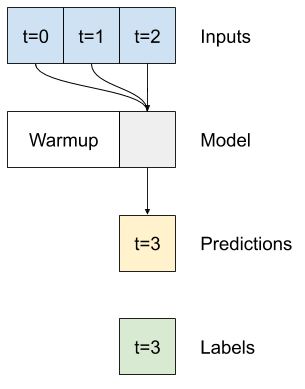

baseline , linear и dense модели обрабатывали каждый временной шаг независимо. Здесь модель будет принимать несколько временных шагов в качестве входных данных для получения одного вывода.

Создайте WindowGenerator , который будет создавать пакеты трехчасовых входных данных и одночасовых меток:

Обратите внимание, что параметр shift Window относится к концу двух окон.

In [ ]:
# Многоступенчатый плотный слой

In [42]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

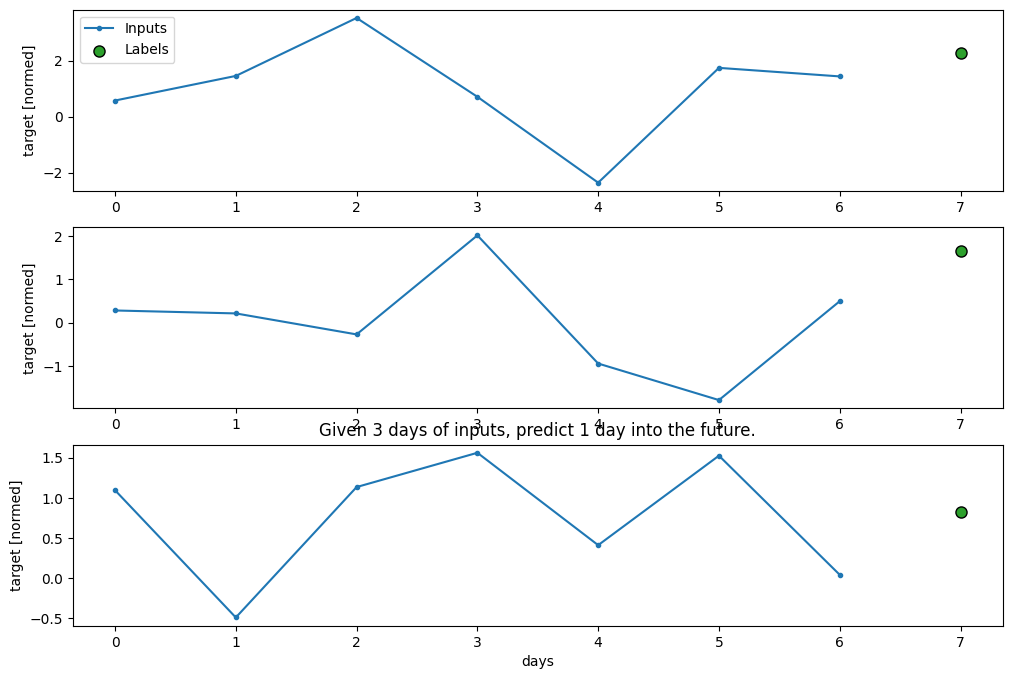

In [43]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

Вы можете обучить dense модель в окне с несколькими входными шагами, добавив tf.keras.layers.Flatten в качестве первого слоя модели:

In [44]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [45]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 1, 1)


In [46]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 0.7638 - mean_absolute_error: 0.6281 - val_loss: 0.5154 - val_mean_absolute_error: 0.5540
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6175 - mean_absolute_error: 0.5610 - val_loss: 0.6097 - val_mean_absolute_error: 0.5980
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 0.5858 - mean_absolute_error: 0.5463 - val_loss: 0.5161 - val_mean_absolute_error: 0.5434
Epoch 4/100
113/113 [==============================] - 1s 4ms/step - loss: 0.5817 - mean_absolute_error: 0.5427 - val_loss: 0.4698 - val_mean_absolute_error: 0.5155
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5778 - mean_absolute_error: 0.5422 - val_loss: 0.4694 - val_mean_absolute_error: 0.5164
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5765 - mean_absolute_error: 0.5402 - val_loss: 0.4694 - val_mean_absolute_error: 0.5165
Epoch 7/10

In [47]:
from IPython.display import clear_output

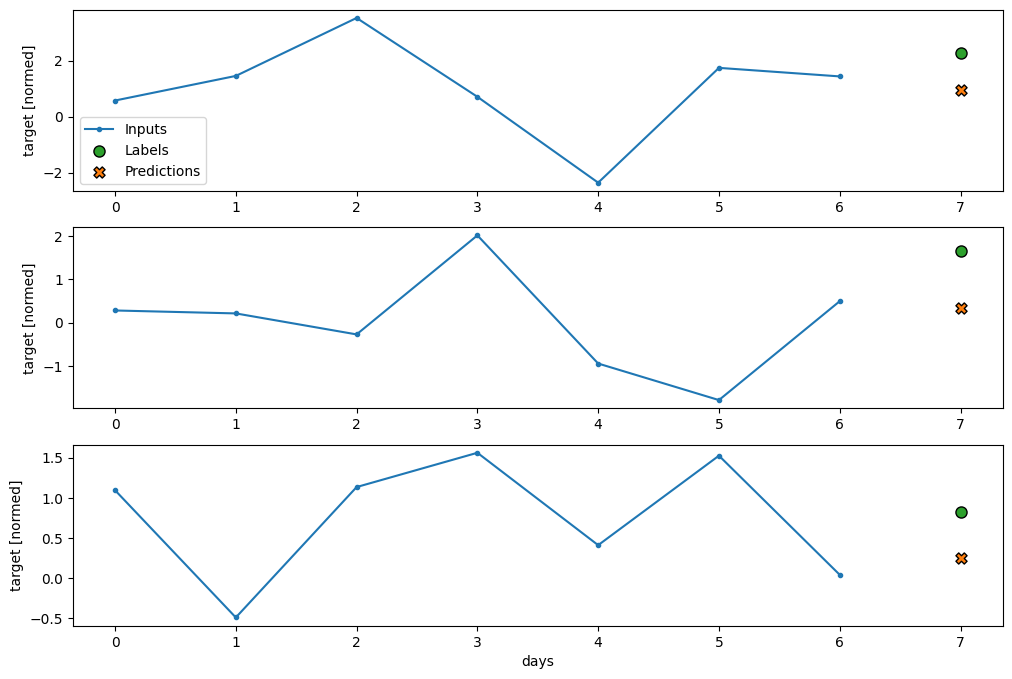

In [48]:
conv_window.plot(multi_step_dense)


In [49]:
target_msd=multi_step_dense.predict(test_df)
target_msd.shape
target_msd

ValueError: in user code:

    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 182, but received input with shape (None, 26)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 26), dtype=float64)
      • training=False
      • mask=None


### Сверточная нейронная сеть
Слой свертки ( tf.keras.layers.Conv1D ) также использует несколько временных шагов в качестве входных данных для каждого прогноза.

Ниже представлена ​​та же модель, что и в multi_step_dense , переписанная с помощью свертки.

Обратите внимание на изменения:

tf.keras.layers.Flatten и первый tf.keras.layers.Dense заменяются tf.keras.layers.Conv1D .
tf.keras.layers.Reshape больше не нужен, так как свертка сохраняет ось времени в своих выходных данных.

In [50]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=20,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


Запустите его на примере пакета, чтобы убедиться, что модель выдает выходные данные с ожидаемой формой:

In [51]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 7, 26)
Output shape: (20, 1, 1)


Обучите и оцените его в conv_window и он должен дать производительность, аналогичную модели multi_step_dense .

In [52]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 2s 5ms/step - loss: 0.8124 - mean_absolute_error: 0.6357 - val_loss: 0.5910 - val_mean_absolute_error: 0.5953
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5919 - mean_absolute_error: 0.5449 - val_loss: 0.6192 - val_mean_absolute_error: 0.6125
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 0.5915 - mean_absolute_error: 0.5443 - val_loss: 0.5196 - val_mean_absolute_error: 0.5493
Epoch 4/100
113/113 [==============================] - 1s 5ms/step - loss: 0.5792 - mean_absolute_error: 0.5368 - val_loss: 0.5396 - val_mean_absolute_error: 0.5552
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 0.5707 - mean_absolute_error: 0.5313 - val_loss: 0.5201 - val_mean_absolute_error: 0.5521
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 0.5758 - mean_absolute_error: 0.5342 - val_loss: 0.5968 - val_mean_absolute_error: 0.5946
Epoch 7/10

Разница между этой conv_model и моделью multi_step_dense заключается в том, что conv_model можно запускать на входах любой длины. Сверточный слой применяется к скользящему окну входных данных:




















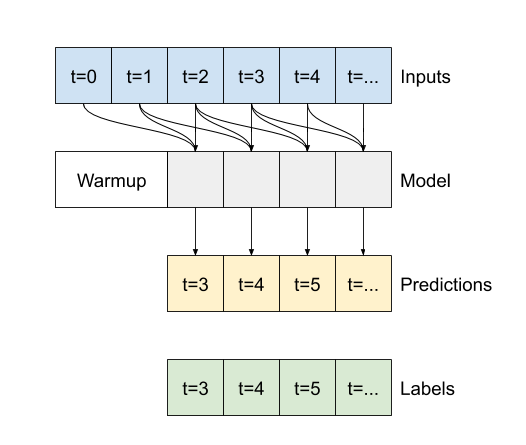

Если вы запустите его на более широком вводе, он выдаст более широкий вывод:

In [53]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 50, 26)
Labels shape: (20, 50, 1)
Output shape: (20, 44, 1)


Обратите внимание, что вывод короче ввода. Чтобы обучение или построение графика работали, вам нужно, чтобы метки и прогноз имели одинаковую длину. Поэтому создайте WindowGenerator для создания широких окон с несколькими дополнительными временными шагами ввода, чтобы длина метки и предсказания совпадала:

In [54]:
LABEL_WIDTH = 50
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 57
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Label indices: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56]
Label column name(s): ['target']

In [55]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 56, 26)
Labels shape: (20, 50, 1)
Output shape: (20, 50, 1)


Теперь вы можете построить прогнозы модели в более широком окне. Обратите внимание на 3 шага входного времени перед первым прогнозом. Каждый прогноз здесь основан на 3 предыдущих временных шагах:

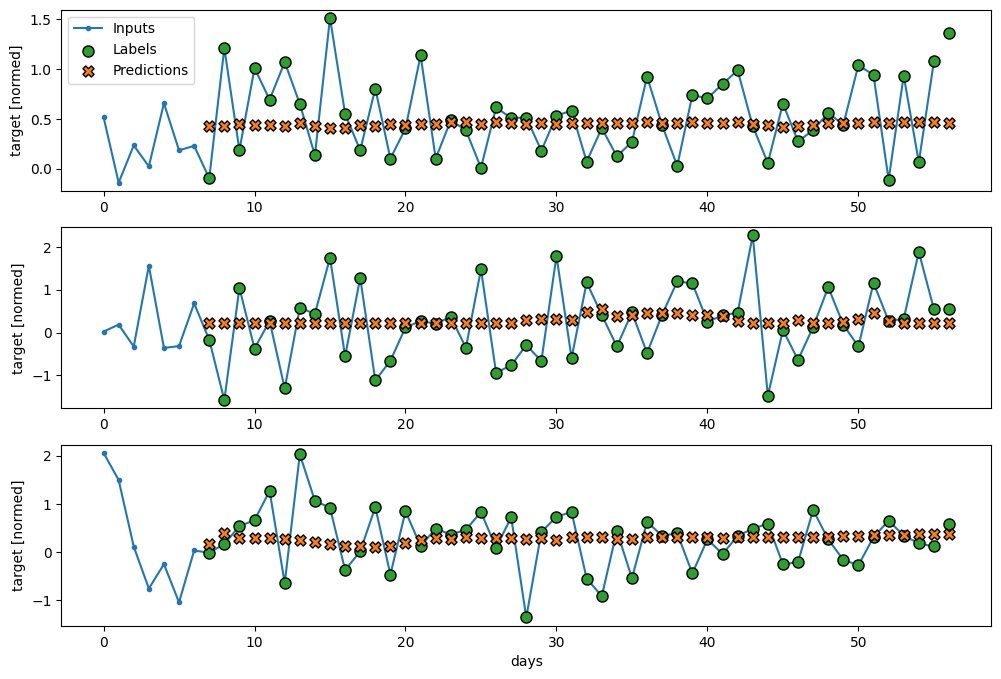

In [56]:
wide_conv_window.plot(conv_model)


In [58]:
target_msd=conv_model.predict(test_df)
target_msd.shape
target_msd

ValueError: in user code:

    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 26)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 26), dtype=float64)
      • training=False
      • mask=None


### Рекуррентная нейронная сеть
Рекуррентная нейронная сеть (RNN) — это тип нейронной сети, хорошо подходящий для данных временных рядов. RNN обрабатывают временной ряд шаг за шагом, сохраняя внутреннее состояние от шага к шагу.

Вы можете узнать больше о создании текста с помощью учебника по RNN и о рекуррентных нейронных сетях (RNN) с руководством по Keras .

В этом руководстве вы будете использовать слой RNN под названием Long Short-Term Memory ( tf.keras.layers.LSTM ).

Важным аргументом конструктора для всех слоев Keras RNN, таких как tf.keras.layers.LSTM , является аргумент return_sequences . Этот параметр может настроить слой одним из двух способов:

Если False по умолчанию, слой возвращает только выходные данные последнего временного шага, давая модели время, чтобы прогреть свое внутреннее состояние, прежде чем делать один прогноз:

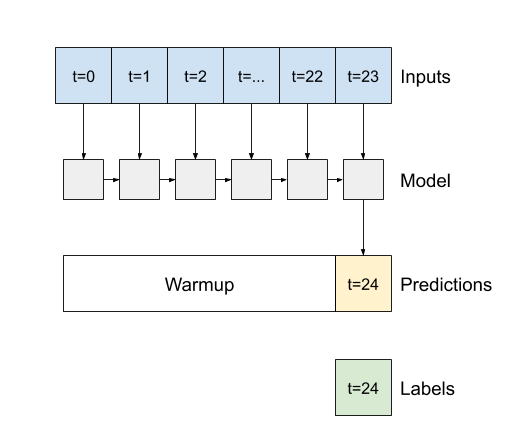

















Если True , слой возвращает результат для каждого входа. Это полезно для:
Укладка слоев RNN.
Обучение модели на нескольких временных шагах одновременно.



In [38]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(20, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


С return_sequences=True модель можно обучать на данных за 24 часа за раз.

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


In [61]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
111/111 [==============================] - 7s 31ms/step - loss: 0.5626 - mean_absolute_error: 0.5286 - val_loss: 0.5713 - val_mean_absolute_error: 0.5706
Epoch 2/100
111/111 [==============================] - 4s 34ms/step - loss: 0.5233 - mean_absolute_error: 0.5101 - val_loss: 0.6264 - val_mean_absolute_error: 0.6075
Epoch 3/100
111/111 [==============================] - 3s 23ms/step - loss: 0.4950 - mean_absolute_error: 0.4999 - val_loss: 0.7864 - val_mean_absolute_error: 0.6952
Epoch 4/100
111/111 [==============================] - 3s 23ms/step - loss: 0.4767 - mean_absolute_error: 0.4942 - val_loss: 0.9516 - val_mean_absolute_error: 0.7753
Epoch 5/100
111/111 [==============================] - 3s 28ms/step - loss: 0.4583 - mean_absolute_error: 0.4871 - val_loss: 1.0393 - val_mean_absolute_error: 0.8083
Epoch 6/100
111/111 [==============================] - 3s 25ms/step - loss: 0.4417 - mean_absolute_error: 0.4804 - val_loss: 1.5559 - val_mean_absolute_error: 1.0338
Epoc

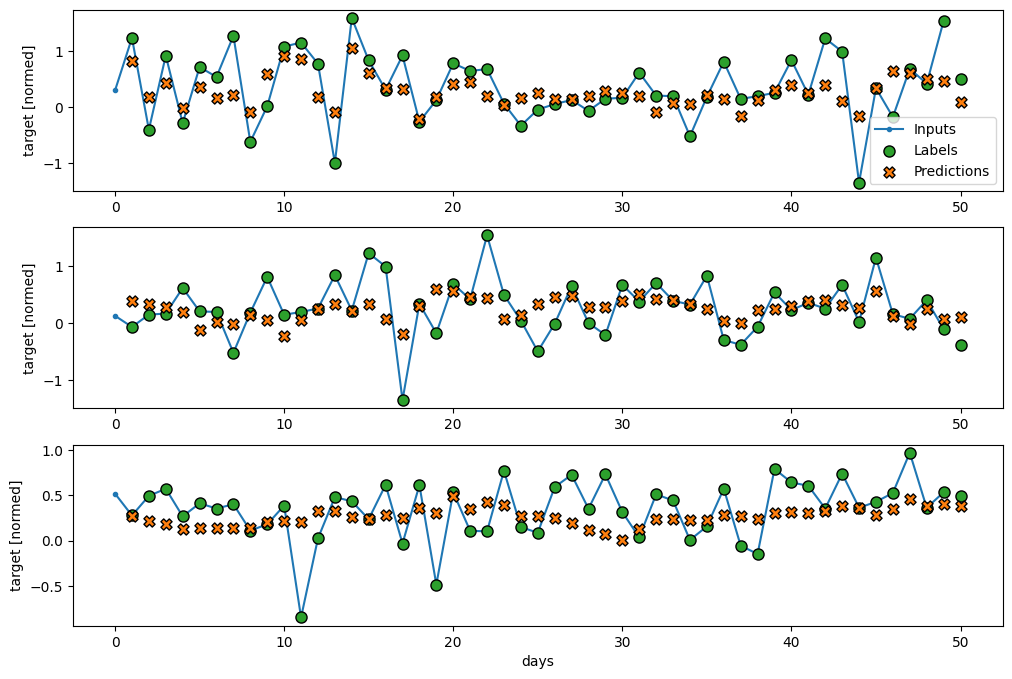

In [62]:
wide_window.plot(lstm_model)


In [69]:
target_msd=lstm_model.predict(test_window.test)
target_msd.shape

38/38 [==============================] - 0s 2ms/step


(750, 1, 1)

In [63]:
#Performance

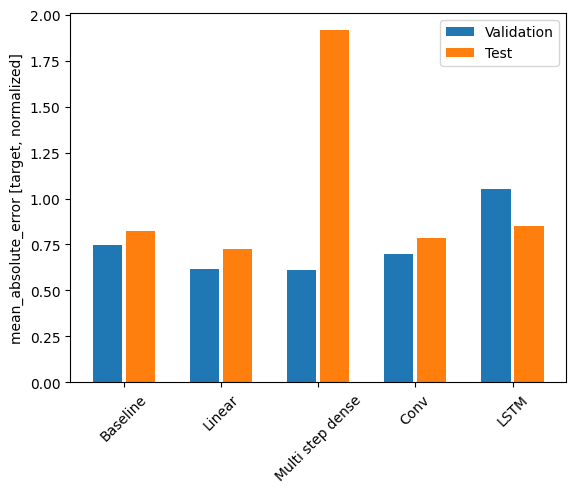

In [64]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [65]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.8219
Linear      : 0.7228
Multi step dense: 1.9139
Conv        : 0.7837
LSTM        : 0.8499
